In [24]:
using Plots
using JLD2
using FileIO
using LaTeXStrings
using Glob

function get_files(direct,filenames)
    filenames=glob(filenames,direct)
    return filenames
end


upscale = 1 #8x upscaling in resolution
fntsm = Plots.font("sans-serif", pointsize=round(10.0*upscale))
fntlg = Plots.font("sans-serif", pointsize=round(14.0*upscale))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
default(size=(800*upscale,600*upscale)) #Plot canvas size

In [25]:
include("../src/Self_recognition-Simulations.jl")

Make_eigenvalue_eigenvectors_stats (generic function with 1 method)

In [244]:
#############
# Set parameters for the optimization
# the parameters chosen here are for systems much smaller then reported in the paper but these can be simulated with out a HPC
# If the data already exists the program will not run again ...Change parameters or delet the data to produce new results
#############


l=100  # length of the patterns

n=10   # number of patterns
max_runin = 20000 #maximal number of steps in the initiation of the system

max_steps = 20000 # maximal number of steps to collect data
β  = 26 # effective inverse temperature for compartment choice 26 corresponds to the largest β_S in the papaer
βeq =15  # effective inverse temperature for equilibration choice 15 corresponds to the largest β_H in the papaer
equil_steps= 10000  # number of equlilibration steps 

γ_steps= 60    # number of data points for the learning rate here we use γ = (1-λ)
compartments=1 # number of compartments
x_max =0.02 # maximal effective mutation rate
xsteps = 20  # number of steps of mutation rate including mu_eff = 0 and then on a log-scale from 0.0001 (can be changed in "Self_recognition-Compartments.jl") to x_max
reps = 20  # number of independet simulations


@time simulate_self_recognition(l,n,max_runin,max_steps,β,βeq,equil_steps,γ_steps,compartments,x_max,xsteps,reps)  


test1
I want to do  ../Data/Workingmemory_compartment/L_100/reps_20/Scaled_temp_compartments_1-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
I'm starting the simulation
only one Compartment
I'm saving the file ../Data/Workingmemory_compartment/L_100/reps_20/Scaled_temp_compartments_1-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
2985.467470 seconds (5.11 G allocations: 4.608 TiB, 16.93% gc time)


In [245]:
###########
## Run the same simulation but with 5 compartments and L*C = constant
############



l=10  # length of the patterns
n=10  # number of patterns

compartments=10 # number of compartments




@time simulate_self_recognition(l,n,max_runin,max_steps,β,βeq,equil_steps,γ_steps,compartments,x_max,xsteps,reps)  



test1
I want to do  ../Data/Workingmemory_compartment/L_10/reps_20/Scaled_temp_compartments_10-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
I'm starting the simulation
you used 10 compartments for 10 patterns
I'm saving the file ../Data/Workingmemory_compartment/L_10/reps_20/Scaled_temp_compartments_10-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
947.365317 seconds (7.08 G allocations: 1.503 TiB, 18.74% gc time)


In [259]:
#######
# plot the results for the optimal learning rate
#
######
l=100
compartments=1
n=10
xsteps = 20 
filename="../Data/Workingmemory_compartment/L_$(l)/reps_$(reps)/Scaled_temp_compartments_$(compartments)-SelfRec_Xsteps_$(xsteps)-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_$(n)_lowx.jld2"




opt_g1,low_g1,up_g1=load(filename,"gammaopt")
plotpoints=convert.(Int,range(2,stop=xsteps,length= xsteps-1))### ignore mu=0 for log plot
mu1=load(filename,"x")[plotpoints]
optlam1=1 .-opt_g1[plotpoints]
up_lam1=1 .-up_g1[plotpoints]
low_lam1=1 .-low_g1[plotpoints];

l=10
compartments=10

filename="../Data/Workingmemory_compartment/L_$(l)/reps_$(reps)/Scaled_temp_compartments_$(compartments)-SelfRec_Xsteps_$(xsteps)-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_$(n)_lowx.jld2"





opt_g1,low_g1,up_g1=load(filename,"gammaopt")
plotpoints=convert.(Int,range(2,stop=xsteps,length= xsteps-1))### ignore mu=0 for log plot
mu5=load(filename,"x")[plotpoints]
optlam5=1 .-opt_g1[plotpoints]
up_lam5=1 .-up_g1[plotpoints]
low_lam5=1 .-low_g1[plotpoints];

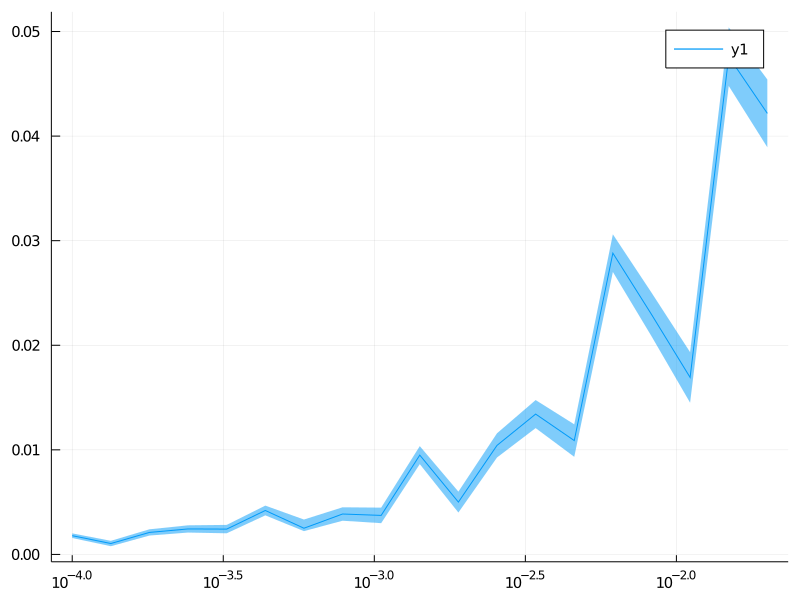

In [260]:
plot(mu1.*n,optlam1,ribbon=(optlam1 .- low_lam1,up_lam1.-optlam1),xscale=:log10)


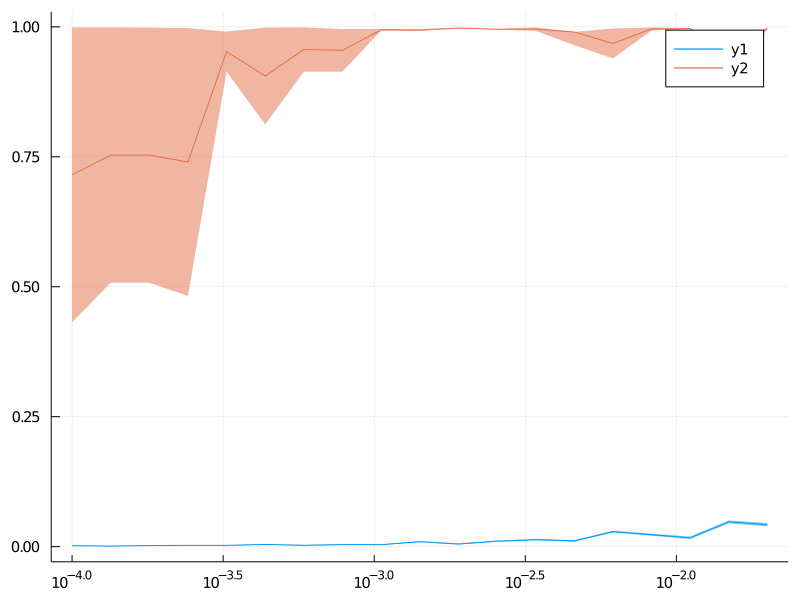

In [261]:
plot!(mu5.*n,optlam5,ribbon=(optlam5 .- low_lam5,up_lam5.-optlam5),xscale=:log10)

In [262]:
include("../src/Self_recognition-Simulations.jl")

Make_eigenvalue_eigenvectors_stats (generic function with 1 method)

In [263]:
#############
# Produce data for the optimal lerning rate 
#############


l=100  # length of the patterns
n=10   # number of patterns
compartments=1 # number of compartments



@time simulate_self_recognition_alongopt(l,n,max_runin,max_steps,β,βeq,equil_steps,γ_steps,compartments,x_max,xsteps,reps)  



I want to do  ../Data/Workingmemory_compartment_opt/L_100/reps_20/Optimal-compartments_1-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
Die daten ../Data/Workingmemory_compartment_opt/L_100/reps_20/Optimal-compartments_1-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2 exestieren schon ich hoehre auf
  0.285489 seconds (1.72 M allocations: 80.488 MiB, 5.64% gc time)


In [264]:
l=10  # length of the patterns
n=10   # number of patterns

compartments=10 # number of compartments


@time simulate_self_recognition_alongopt(l,n,max_runin,max_steps,β,βeq,equil_steps,γ_steps,compartments,x_max,xsteps,reps)  



I want to do  ../Data/Workingmemory_compartment_opt/L_10/reps_20/Optimal-compartments_10-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2
Die daten ../Data/Workingmemory_compartment_opt/L_10/reps_20/Optimal-compartments_10-SelfRec_Xsteps_20-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_10_lowx.jld2 exestieren schon ich hoehre auf
  0.000162 seconds (91 allocations: 4.609 KiB)


In [265]:
#######
# plot the results for performance at the optimal learning rate
#
######
l=100
compartments=1
n=10
filename="../Data/Workingmemory_compartment_opt/L_$(l)/reps_$(reps)/Optimal-compartments_$(compartments)-SelfRec_Xsteps_$(xsteps)-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_$(n)_lowx.jld2"





plotpoints=convert.(Int,range(2,stop=xsteps,length= xsteps-1))### ignore mu=0 for log plot
mu1=load(filename,"x")[plotpoints]
overlapsload1=load(filename,"overlaps")./l

meanoverlaps1=zeros(length(plotpoints))
for point in plotpoints
    meanoverlaps1[point-1]=mean(overlapsload1[:,point])
end





l=10
compartments=10
filename="../Data/Workingmemory_compartment_opt//L_$(l)/reps_$(reps)/Optimal-compartments_$(compartments)-SelfRec_Xsteps_$(xsteps)-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_$(n)_lowx.jld2"





plotpoints=convert.(Int,range(2,stop=xsteps,length= xsteps-1))### ignore mu=0 for log plot
overlapsload2=load(filename,"overlaps")./l
meanoverlaps2=zeros(length(plotpoints))
for point in plotpoints
    meanoverlaps2[point-1]=mean(overlapsload2[:,point])
end

pattern_used=load(filename,"pattern_used")
compartment_used=load(filename,"compartment_used");

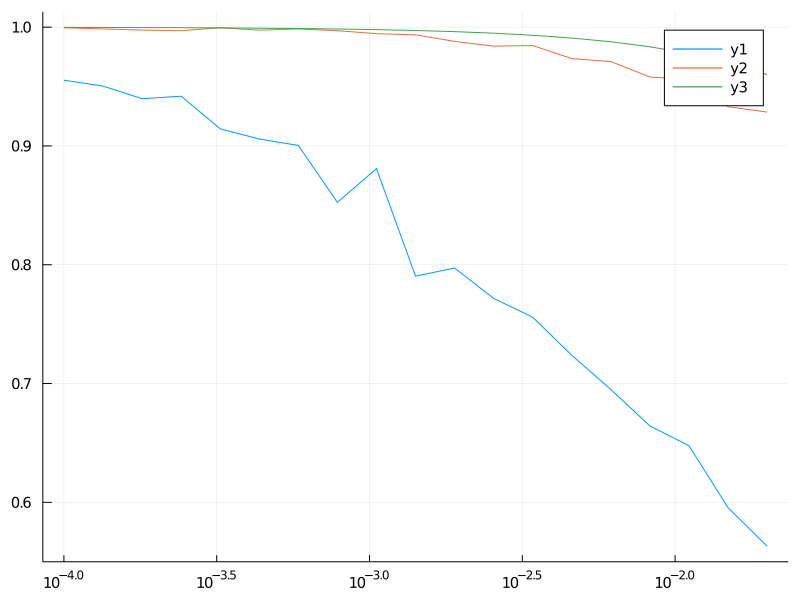

In [266]:
plot(mu1.*n,meanoverlaps1)
plot!(mu5.*n,meanoverlaps2)

plot!(mu5.*n,1 .- 2 .* mu5.*n,xscale=:log10)

In [ ]:

Analysis for  figures  S5 XXXX 

Analysis of the performance statisitcs with overlaps as in figure S5 mean values as a function of the mutation rate give the results for FiG SXXX 

In [42]:
mu_point_analysis=20


l=100  # length of the patterns

n=10   # number of patterns
max_runin = 20000 #maximal number of steps in the initiation of the system

max_steps = 20000 # maximal number of steps to collect data
β  = 26 # effective inverse temperature for compartment choice 26 corresponds to the largest β_S in the papaer
βeq =15  # effective inverse temperature for equilibration choice 15 corresponds to the largest β_H in the papaer
equil_steps= 10000  # number of equlilibration steps 

γ_steps= 60    # number of data points for the learning rate here we use γ = (1-λ)
compartments=1 # number of compartments
x_max =0.02 # maximal effective mutation rate
xsteps = 20  # number of steps of mutation rate including mu_eff = 0 and then on a log-scale from 0.0001 (can be changed in "Self_recognition-Compartments.jl") to x_max
reps = 20  # number of independet simulations


filename="../Data/Workingmemory_compartment_opt/L_$(l)/reps_$(reps)/Optimal-compartments_$(compartments)-SelfRec_Xsteps_$(xsteps)-temp_26-elqutemp_15_Xmax_0.02_runin_20000_eqsteps_10000_Patterns_$(n)_lowx.jld2"


### loading the opitmal learning rate and the mutation at mu_point_analysis definded above 
mu1=load(filename,"x")[mu_point_analysis]
γ=load(filename,"gamma")[mu_point_analysis]


runin=max(10*n,min.(floor.(Int64,log(0.0001)./ log.(γ) .+1)))
steps=runin
     β_eq_scaled=10^(βeq/10)*n/compartments
reps=50
dist_start,dist_next,open_paths,     dist_start_rand,dist_next_rand,open_paths_rand,   partision_mean_vecs,partision_std_vecs,partision_first_vecs,partision_last_vecs,partision_mean_patts,partision_std_patts,partision_first_patts,partision_last_patts,best_overlaps,mean_current_direction,best_next_direciton= get_statistics_One_allstats(l,n,mu1,γ,runin,steps,reps,equil_steps*10,β_eq_scaled);

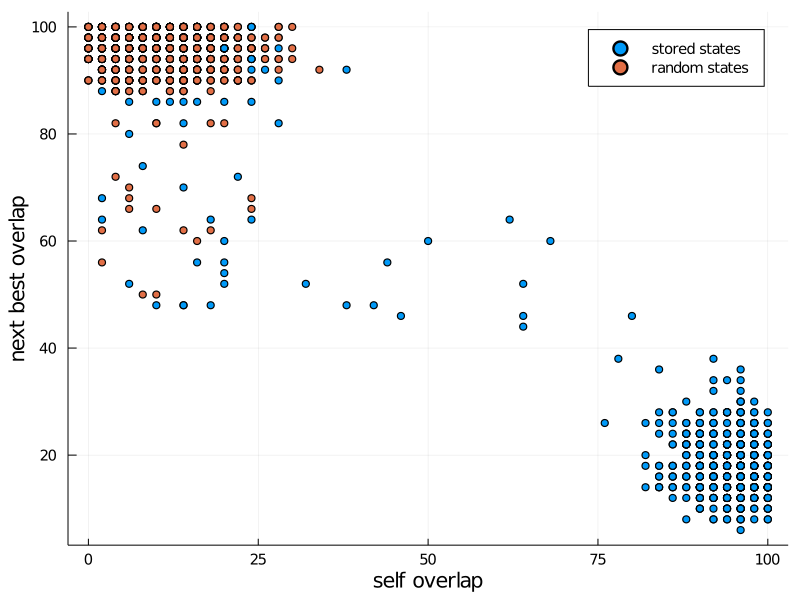

In [43]:
scatter(dist_start,dist_next,label="stored states")
scatter!(dist_start_rand,dist_next_rand,label="random states",xlabel="self overlap",ylabel="next best overlap")

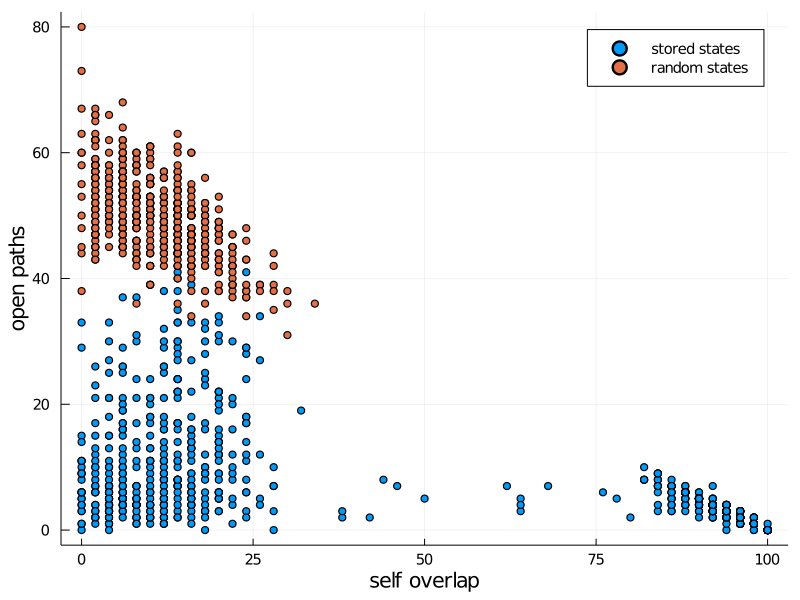

In [44]:
scatter(dist_start,open_paths,label="stored states")
scatter!(dist_start_rand,open_paths_rand,label="random states",xlabel="self overlap",ylabel="open paths")

Mean partisipation, std of pratisipaiton as well as the lowest energy and highest energy pattern are given as 

In [55]:
partision_mean_patts,partision_std_patts,partision_first_patts,partision_last_patts

(1.7673887236051902, 0.7248491861744529, 1.2327491712920513, 1.3447799314955047)

these values as a function of the mutation rate give FIG SXXX BD

In [ ]:
# calculation of Fig S ...  for only the first component SXX C

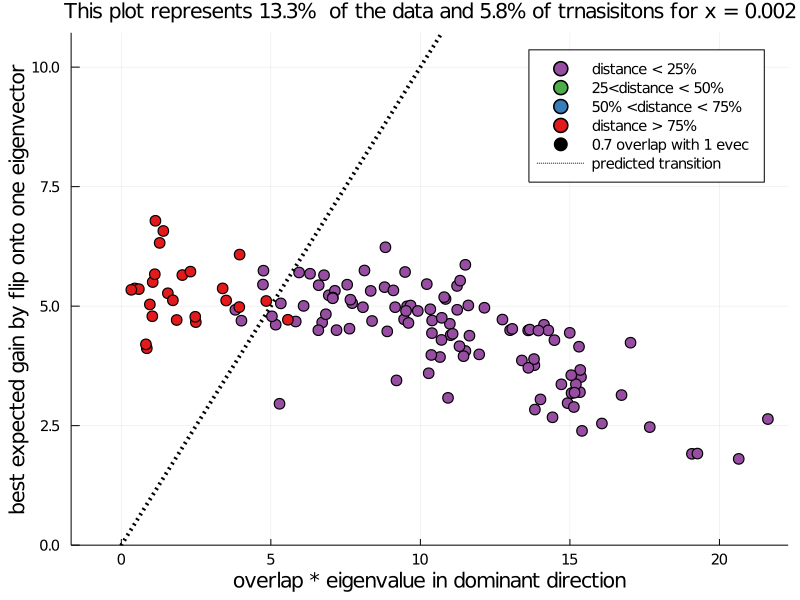

In [54]:
datates=[1,2,dist_start./100,4,best_overlaps,mean_current_direction,best_next_direciton];
l=l
using ColorSchemes
import ColorSchemes.Set1_4
cs=Set1_4
tresh=0.7
pottsize=6

forms=[:circle,:utriangle,:star5,:star5,:star7,:star7,:star7,:+,:+,:+]

points=length(datates[5][1])
plotted=1
used="all"
points,used=1,"first"

transitions=0
transitionsplotted=0

scatter([-1],[-1],color=cs[4],markersize=pottsize,label="distance < 25%")
scatter!([-1],[-1],color=cs[3],markersize=pottsize,label="25<distance < 50%")

        scatter!([-1],[-1],color=cs[2],markersize=pottsize,label="50% <distance < 75%")

        scatter!([-1],[-1],color=cs[1],markersize=pottsize,label="distance > 75%",key=:topleft)


scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[1],label="$(tresh) overlap with 1 evec")
    
   for ii in 1:convert(Int64,length(datates[5]))
       surching=true
        jj=1
        if (datates[3][ii]<0.5)
                transitions+=1
        end
        while (jj<= points && surching)
            
        
            if (datates[5][ii][jj] >tresh)
                scatter!([datates[6][ii][jj]]./sqrt(datates[5][ii][jj]),[datates[7][ii][jj]],color=cs[convert(Int64,4 - floor((1-datates[3][ii]) *3.999))],markersize=pottsize,label="",m=forms[jj])
                surching=false
                plotted+=1
                if (datates[3][ii]<0.5)
                    transitionsplotted+=1
                end
            end
        jj+=1
        end

 end
 



    

if (used=="all")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[2],label=" with 2 evecs")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[3],label="$with 3-4 evec")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[5],label="$with 5-7 evec")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[8],label="$with 8-10 evec")
end


    
    

line=range(minimum(minimum(datates[6])),stop=maximum(maximum(datates[7][:])),length=10)
    
top=maximum(maximum(datates[7][:]))
scatter_plot=plot!(line,line,linewidth=4,linestyle=:dot,color=:black,label="predicted transition",ylims=(0,top),key=:topright,title="This plot represents $(round_digest(plotted/length(datates[5])*100,1))%  of the data and $(round_digest(transitionsplotted/transitions*100,1))% of trnasisitons for x = $(round_digest(mu1,4))",xlabel="overlap * eigenvalue in dominant direction",ylabel="best expected gain by flip onto one eigenvector")
scatter_plot

In [ ]:
# calculation of Fig S ...  for only the multiple  components SXX D

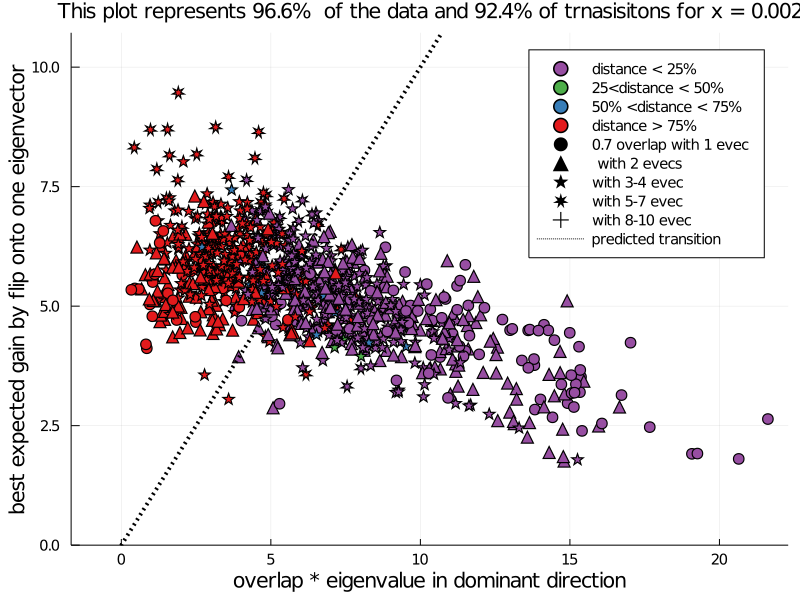

In [53]:
datates=[1,2,dist_start./100,4,best_overlaps,mean_current_direction,best_next_direciton];
l=l
using ColorSchemes
import ColorSchemes.Set1_4
cs=Set1_4
tresh=0.7
pottsize=6

forms=[:circle,:utriangle,:star5,:star5,:star7,:star7,:star7,:+,:+,:+]

points=length(datates[5][1])
plotted=1
used="all"
#points,used=1,"first"

transitions=0
transitionsplotted=0

scatter([-1],[-1],color=cs[4],markersize=pottsize,label="distance < 25%")
scatter!([-1],[-1],color=cs[3],markersize=pottsize,label="25<distance < 50%")

        scatter!([-1],[-1],color=cs[2],markersize=pottsize,label="50% <distance < 75%")

        scatter!([-1],[-1],color=cs[1],markersize=pottsize,label="distance > 75%",key=:topleft)


scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[1],label="$(tresh) overlap with 1 evec")
    
   for ii in 1:convert(Int64,length(datates[5]))
       surching=true
        jj=1
        if (datates[3][ii]<0.5)
                transitions+=1
        end
        while (jj<= points && surching)
            
        
            if (datates[5][ii][jj] >tresh)
                scatter!([datates[6][ii][jj]]./sqrt(datates[5][ii][jj]),[datates[7][ii][jj]],color=cs[convert(Int64,4 - floor((1-datates[3][ii]) *3.999))],markersize=pottsize,label="",m=forms[jj])
                surching=false
                plotted+=1
                if (datates[3][ii]<0.5)
                    transitionsplotted+=1
                end
            end
        jj+=1
        end

 end
 



    

if (used=="all")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[2],label=" with 2 evecs")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[3],label="$with 3-4 evec")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[5],label="$with 5-7 evec")
    scatter!([-1],[-1],color=:black,markersize=pottsize,m=forms[8],label="$with 8-10 evec")
end


    
    

line=range(minimum(minimum(datates[6])),stop=maximum(maximum(datates[7][:])),length=10)
    
top=maximum(maximum(datates[7][:]))
scatter_plot=plot!(line,line,linewidth=4,linestyle=:dot,color=:black,label="predicted transition",ylims=(0,top),key=:topright,title="This plot represents $(round_digest(plotted/length(datates[5])*100,1))%  of the data and $(round_digest(transitionsplotted/transitions*100,1))% of trnasisitons for x = $(round_digest(mu1,4))",xlabel="overlap * eigenvalue in dominant direction",ylabel="best expected gain by flip onto one eigenvector")
scatter_plot